#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [1]:
! pip install mysql-connector-python

In [2]:
! pip list | findstr mysql-connector-python

mysql-connector-python            9.0.0


In [3]:
import datetime
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd
from mysql.connector.connection import MySQLConnection

Connect to DB

In [81]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

In [36]:
sql = """
select year(hire_date) as hire_year, count(emp_no) as emp_num 
from employees group by hire_year order by emp_num desc;
"""

In [82]:
type(con)

mysql.connector.connection_cext.CMySQLConnection

In [38]:
df = pd.read_sql(sql, con)

C:\Users\ypushiev\AppData\Local\Temp\ipykernel_21696\1454131049.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con)


1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [39]:
df.head(16)

,hire_year,emp_num
0,1986,36150
1,1985,35316
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

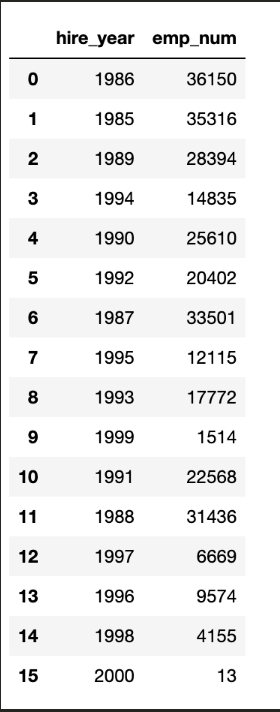

In [80]:
con.close()

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

In [68]:
df_sorted = df.sort_values(by=['hire_year'])
df_sorted

,hire_year,emp_num
1,1985,35316
0,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


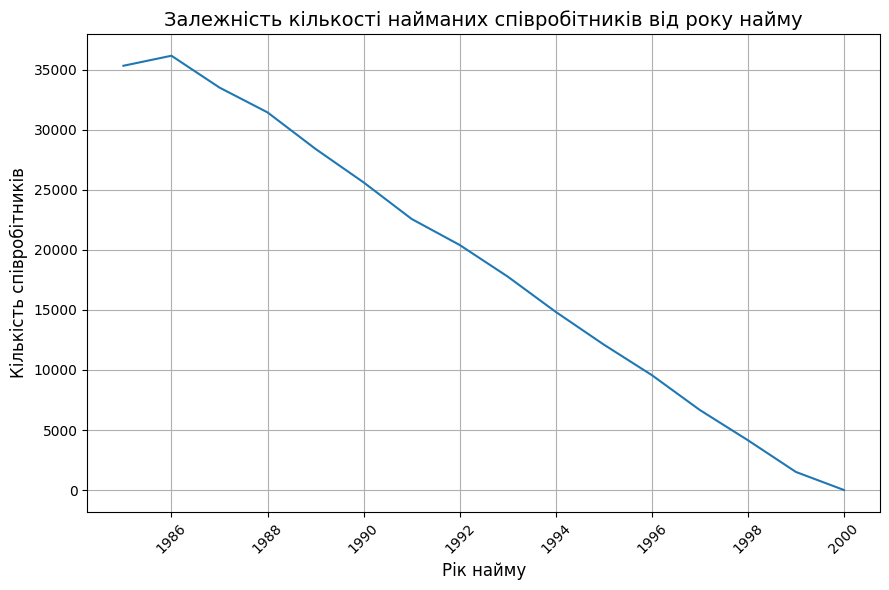

In [79]:
plt.figure(figsize=(9,6))
plt.plot(df_sorted['hire_year'], df_sorted['emp_num'])
plt.title('Залежність кількості найманих співробітників від року найму', fontsize=14)
plt.xlabel('Рік найму', fontsize=12)
plt.ylabel('Кількість співробітників', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Поворот підписів по осі X для зручності
plt.tight_layout()

# Виведення графіка на екран
plt.show()



Очікуваний результат:

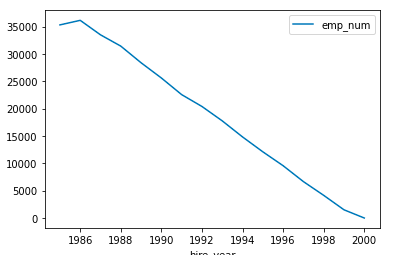


3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [97]:
sql_years = """ 
SELECT 
  TIMESTAMPDIFF(YEAR, t.from_date, t.to_date) AS 'duration',
  t.from_date,
  t.to_date
FROM 
  titles t 
WHERE 
  t.to_date <> '9999-01-01' 
  AND t.title = 'Engineer';
"""

In [98]:
df_years = pd.read_sql(sql_years, con)

C:\Users\ypushiev\AppData\Local\Temp\ipykernel_21696\4206943830.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql(sql_years, con)


In [100]:
display(
    df_years.head(),
    df_years.tail(),
    df_years.shape
)


,duration,from_date,to_date
0,9,1986-12-01,1995-12-01
1,5,1990-02-18,1995-02-18
2,8,1992-12-18,2000-12-18
3,8,1987-04-03,1995-04-03
4,5,1995-03-20,2001-03-19


,duration,from_date,to_date
84015,9,1989-11-23,1998-11-23
84016,5,1989-07-30,1994-07-30
84017,0,1993-02-22,1993-10-27
84018,6,1996-05-13,2002-05-13
84019,4,1987-08-30,1992-08-29


(84020, 3)

Очікуваний результат:

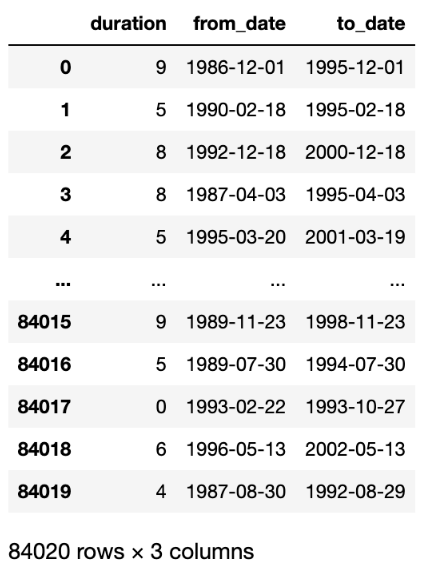

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

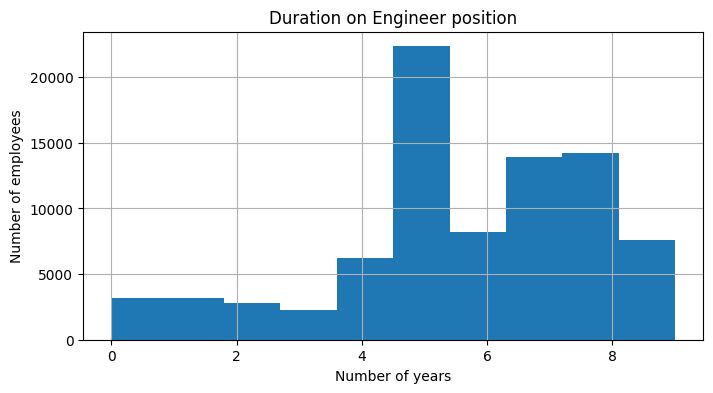

In [111]:
# df_salaries = df_years[df_years['to_date'] == 'Engineer']
plt.figure(figsize=(8, 4))
plt.hist(df_years['duration'], bins=10)
plt.title("Duration on Engineer position")
plt.xlabel("Number of years")
plt.ylabel("Number of employees")
plt.grid(True)
plt.show()

Очікуваний результат:

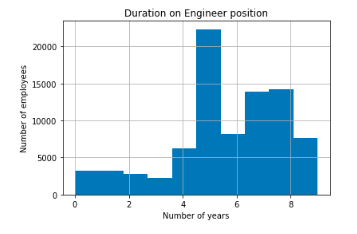

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [112]:
con.close()